In [1]:
!pip install chart_studio
!pip install wordcloud
!pip install ftfy
!pip install rake_nltk
!pip install gensim 
!pip install missingno
!pip install googletrans
!pip install langdetect
!pip install imblearn
!pip install collections2

# Standard Library
import pandas as pd
import numpy as np

from ftfy import *
import nltk
from rake_nltk import Rake

from utils.visualization import *
from utils.datapreprocessing import *

import missingno as msno
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns 

# For Translation
from googletrans import Translator
from langdetect import detect

#For Upsampling
import imblearn
from collections import Counter
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE

In [2]:
filename= "dataset/HarshaCharan_output.csv"
df = pd.read_csv(filename)

In [3]:
df.head(5)


,Short description,Description,Caller,Assignment group,Raked Short description,Raked Description,Iso_Description,Language_Description,Translated_Description,Iso_Short description,Language_Short description,Translated_Short description,Length of Translated_Description Before Summarization,Length of Translated_Short description Before Summarization,pred_group,AssignmentGroup,ShortDescription,PredictedGroup
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,['login issue'],"['verified user details', 'user name', 'manage...",en,English,-verified user details.(employee# & manager na...,en,English,login issue,33,2,NaN,GRP_0,login issue,NaN
1,outlook,"received from: emailaddress hello team, my...",hmjdrvpb komuaywn,GRP_0,['outlook'],"['somebody please advise', 'com hello team', '...",en,English,"received from: emailaddress hello team, my...",en,English,outlook,25,1,NaN,GRP_0,outlook,NaN
2,cant log in to vpn,received from: emailaddress hi i cannot lo...,eylqgodm ybqkwiam,GRP_0,"['cant log', 'vpn']","['vpn best', 'com hi', 'cannot log', 'ybqkwiam...",en,English,received from: emailaddress hi i cannot lo...,en,English,cant log in to vpn,11,5,NaN,GRP_0,cant log in to vpn,NaN
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,"['access hr_tool page', 'unable']","['access hr_tool page', 'unable']",en,English,unable to access hr_tool page,en,English,unable to access hr_tool page,5,5,NaN,GRP_0,unable to access hr_tool page,NaN
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,['skype error'],['skype error'],ja,Japanese,skype error,ja,Japanese,skype error,2,2,NaN,GRP_0,skype error,NaN


In [4]:
df.count()

Short description                                              8500
Description                                                    8500
Caller                                                         8500
Assignment group                                               8500
Raked Short description                                        8500
Raked Description                                              8500
Iso_Description                                                8500
Language_Description                                           8500
Translated_Description                                         8500
Iso_Short description                                          8500
Language_Short description                                     8500
Translated_Short description                                   8500
Length of Translated_Description Before Summarization          8500
Length of Translated_Short description Before Summarization    8500
pred_group                                      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Short description                                            8500 non-null   object
 1   Description                                                  8500 non-null   object
 2   Caller                                                       8500 non-null   object
 3   Assignment group                                             8500 non-null   object
 4   Raked Short description                                      8500 non-null   object
 5   Raked Description                                            8500 non-null   object
 6   Iso_Description                                              8500 non-null   object
 7   Language_Description                                         8500 non-null   object
 8 

In [6]:
df2 = df[(df['PredictedGroup'].isna())]

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8184 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Short description                                            8184 non-null   object
 1   Description                                                  8184 non-null   object
 2   Caller                                                       8184 non-null   object
 3   Assignment group                                             8184 non-null   object
 4   Raked Short description                                      8184 non-null   object
 5   Raked Description                                            8184 non-null   object
 6   Iso_Description                                              8184 non-null   object
 7   Language_Description                                         8184 non-null   object
 8 

In [8]:
df2.head()

,Short description,Description,Caller,Assignment group,Raked Short description,Raked Description,Iso_Description,Language_Description,Translated_Description,Iso_Short description,Language_Short description,Translated_Short description,Length of Translated_Description Before Summarization,Length of Translated_Short description Before Summarization,pred_group,AssignmentGroup,ShortDescription,PredictedGroup
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,['login issue'],"['verified user details', 'user name', 'manage...",en,English,-verified user details.(employee# & manager na...,en,English,login issue,33,2,NaN,GRP_0,login issue,NaN
1,outlook,"received from: emailaddress hello team, my...",hmjdrvpb komuaywn,GRP_0,['outlook'],"['somebody please advise', 'com hello team', '...",en,English,"received from: emailaddress hello team, my...",en,English,outlook,25,1,NaN,GRP_0,outlook,NaN
2,cant log in to vpn,received from: emailaddress hi i cannot lo...,eylqgodm ybqkwiam,GRP_0,"['cant log', 'vpn']","['vpn best', 'com hi', 'cannot log', 'ybqkwiam...",en,English,received from: emailaddress hi i cannot lo...,en,English,cant log in to vpn,11,5,NaN,GRP_0,cant log in to vpn,NaN
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,"['access hr_tool page', 'unable']","['access hr_tool page', 'unable']",en,English,unable to access hr_tool page,en,English,unable to access hr_tool page,5,5,NaN,GRP_0,unable to access hr_tool page,NaN
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,['skype error'],['skype error'],ja,Japanese,skype error,ja,Japanese,skype error,2,2,NaN,GRP_0,skype error,NaN


In [9]:
df3 = pd.DataFrame()
df3['Translated_Description'] = df2['Translated_Description']
df3['Translated_Short description'] = df2['Translated_Short description']
df3['Assignment group'] = df2['Assignment group']

In [10]:
df3

,Translated_Description,Translated_Short description,Assignment group
0,-verified user details.(employee# & manager na...,login issue,GRP_0
1,"received from: emailaddress hello team, my...",outlook,GRP_0
2,received from: emailaddress hi i cannot lo...,cant log in to vpn,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0
...,...,...,...
8495,"received from: emailaddress good afternoon,...",emails not coming in from zz mail,GRP_29
8496,telephony_software issue,telephony_software issue,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,GRP_0
8498,i am unable to access the machine utilities to...,machine is not working,GRP_62


In [48]:
#!pip install chart_studio
#!pip install wordcloud
#!pip install ftfy
#!pip install rake_nltk
#!pip install gensim 
#!pip install missingno
#!pip install googletrans
#!pip install langdetect

# Standard Library
import pandas as pd
import numpy as np

from ftfy import *
import nltk
from rake_nltk import Rake

from utils.visualization import *
from utils.datapreprocessing import *

import missingno as msno
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns 

# For Translation
from googletrans import Translator
from langdetect import detect

In [49]:
for des in df3['Translated_Description']:
    des = clean_text(des)
print("'Description' Cleaning is complete.")

'Description' Cleaning is complete.


In [50]:
for short_des in df3['Translated_Short description']:
    short_des = clean_text(short_des)
print("'Short description' cleaning is complete.")

'Short description' cleaning is complete.


In [51]:
r = Rake()

In [52]:
df3['Raked Short description'] = df3['Translated_Short description'].apply(rake_implement)
df3['Raked Description'] = df3['Translated_Description'].apply(rake_implement)

In [53]:
df3['Raked Description'][0]

['verified user details',
 'user name',
 'manager name',
 'issue resolved',
 'caller confirmed',
 'user',
 'reset',
 'password',
 'login',
 'employee',
 'checked',
 'check',
 'advised',
 'ad',
 'able']

In [54]:
## 6(a). EDA on length of Translated_Description is more than 150

In [55]:
df3.loc[ df3['Translated_Description'].apply(lambda x : len(x) > 150) ].shape

(2534, 7)

In [56]:
df3['Length of Translated_Description Before Summarization'] = df3['Translated_Description'].apply(lambda x: len(str(x).split()))

df3['Length of Translated_Short description Before Summarization'] = df3['Translated_Short description'].apply(lambda x: len(str(x).split()))

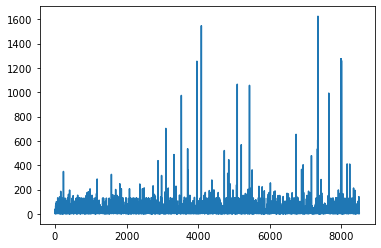

In [57]:
df3['Length of Translated_Description Before Summarization'].plot()

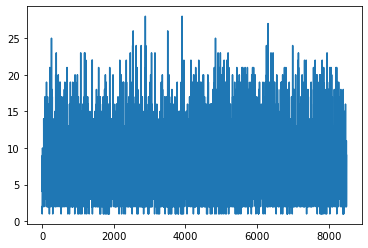

In [58]:
df3['Length of Translated_Short description Before Summarization'].plot()

In [59]:
df3['Summarized_Translated_Description'] = df3['Translated_Description'].apply(create_summarized_feature)

Can't Summarize this sentence as input has only one sentence. Hence, replacing with (Rake + Summarized Value)
Can't Summarize this sentence as input has only one sentence. Hence, replacing with (Rake + Summarized Value)
Can't Summarize this sentence as input has only one sentence. Hence, replacing with (Rake + Summarized Value)
Can't Summarize this sentence as input has only one sentence. Hence, replacing with (Rake + Summarized Value)
Can't Summarize this sentence as input has only one sentence. Hence, replacing with (Rake + Summarized Value)


In [60]:
df3['Length of Translated_Description After Summarization'] = df3['Summarized_Translated_Description'].apply(lambda x: len(str(x).split()))

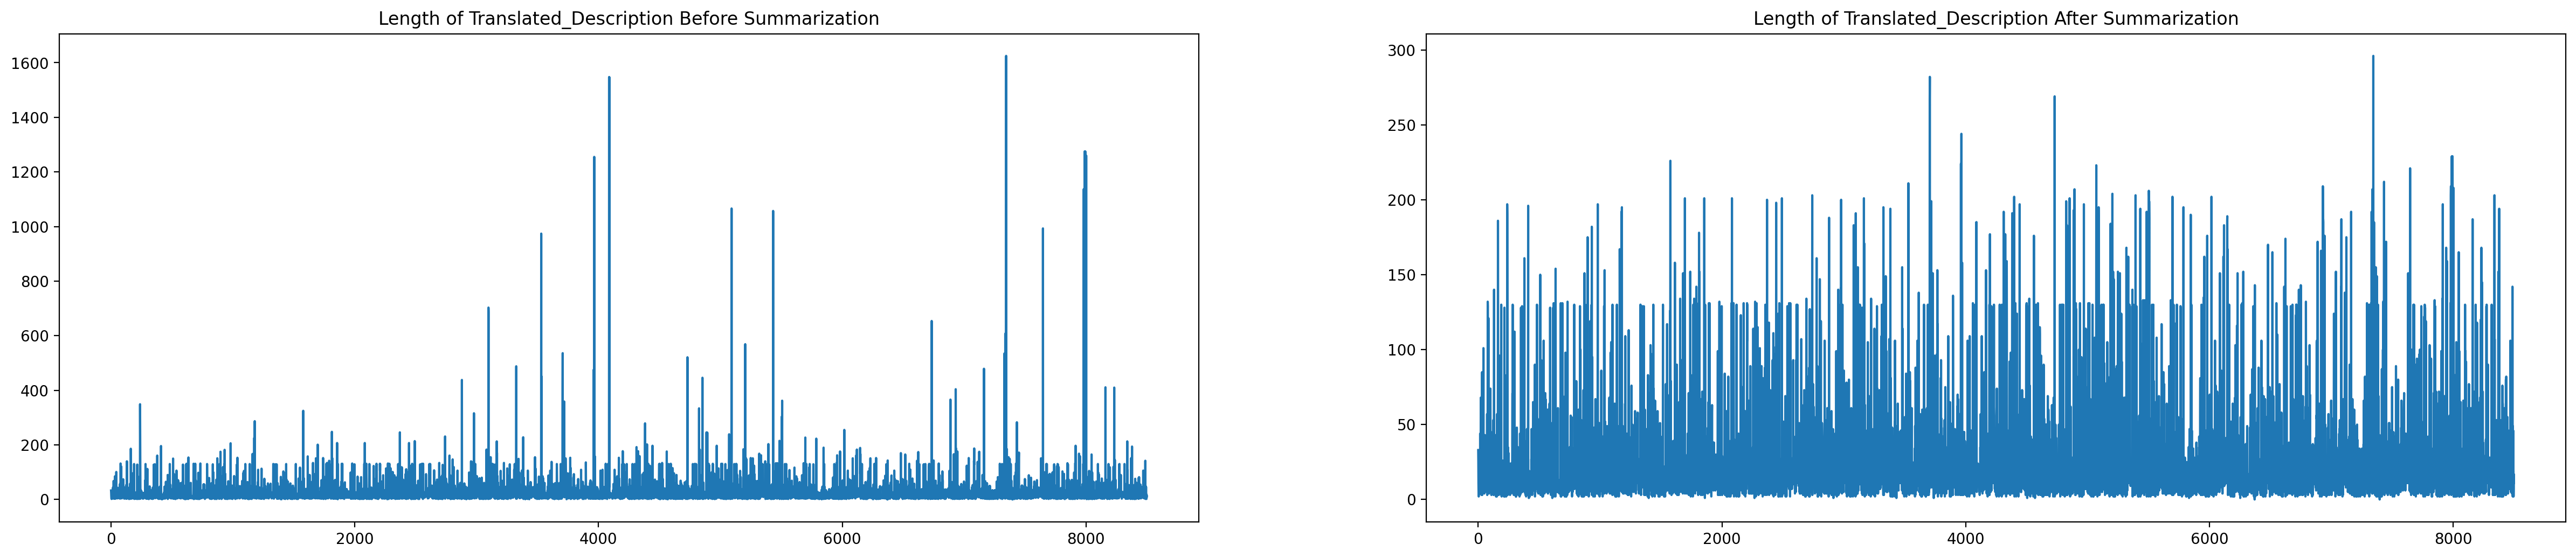

In [61]:
plt.figure(figsize=(30, 6), dpi=200)
plt.subplot(1, 2, 1)
df3['Length of Translated_Description Before Summarization'].plot()
plt.title('Length of Translated_Description Before Summarization')

plt.subplot(1, 2, 2)
df3['Length of Translated_Description After Summarization'].plot()
plt.title('Length of Translated_Description After Summarization')
plt.show()

In [62]:
df3.loc[ df3['Summarized_Translated_Description'].apply(lambda x : len(x.split()) > 150) ][['Length of Translated_Description After Summarization', 'Summarized_Translated_Description']]

,Length of Translated_Description After Summarization,Summarized_Translated_Description
162,186,"received from: emailaddress hello, till la..."
238,197,hi all we have a connectivity issue between e...
239,190,please complete all required questions below.\...
379,161,"received from: emailaddress hi it experts, ..."
410,196,Myhrt sthry retired as plant manager in usa. i...
...,...,...
8160,187,received from: emailaddress please release th...
8232,168,habe noch kein ticket erhalten ...\nmit freund...
8339,203,"hello team, could you please unlock account ..."
8371,152,from: microsoft on behalf of company inc. emai...


# Step 7: Feature Engineering : 'Complete_Description'
----------
Creating a 'Complete_Description' by concatinating 'Translated_Short description' and 'Summarized_Translated_Description' Values 

In [63]:
# Concatenate Short description and Description
df3['Complete_Description'] = df3['Summarized_Translated_Description'] + " " + df3['Translated_Short description']
df3.head(10)

,Translated_Description,Translated_Short description,Assignment group,Length of Translated_Description Before Summarization,Length of Translated_Short description Before Summarization,Raked Short description,Raked Description,Summarized_Translated_Description,Length of Translated_Description After Summarization,Complete_Description
0,-verified user details.(employee# & manager na...,login issue,GRP_0,33,2,[login issue],"[verified user details, user name, manager nam...",-verified user details.(employee# & manager na...,33,-verified user details.(employee# & manager na...
1,"received from: emailaddress hello team, my...",outlook,GRP_0,25,1,[outlook],"[somebody please advise, emailaddress hello te...","received from: emailaddress hello team, my...",25,"received from: emailaddress hello team, my..."
2,received from: emailaddress hi i cannot lo...,cant log in to vpn,GRP_0,11,5,"[cant log, vpn]","[vpn best, emailaddress hi, cannot log, received]",received from: emailaddress hi i cannot lo...,11,received from: emailaddress hi i cannot lo...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,5,5,"[access hr_tool page, unable]","[access hr_tool page, unable]",unable to access hr_tool page,5,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,2,2,[skype error],[skype error],skype error,2,skype error skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,9,9,"[engineering tool, unable, skype, log]","[engineering tool, unable, skype, log]",unable to log in to engineering tool and skype,9,unable to log in to engineering tool and skype...
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,11,9,"[mountpoint threshold, value, sid_37, oracle, ...","[mountpoint threshold, value, sr3psa1d_7, sr3p...",event: critical:HostName_221.company.com the v...,11,event: critical:HostName_221.company.com the v...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,9,9,"[new non, enter user, employment status, ticke...","[new non, enter user, employment status, ticke...",ticket_no1550391- employment status - new non-...,9,ticket_no1550391- employment status - new non-...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,7,7,"[disable add ins, unable, outlook]","[disable add ins, unable, outlook]",unable to disable add ins on outlook,7,unable to disable add ins on outlook unable to...
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,4,4,"[ticket update, inplant_874773]","[ticket update, inplant_874773]",ticket update on inplant_874773,4,ticket update on inplant_874773 ticket update ...


## Finally coverting the df values to str type

In [64]:
# We will use applymap() as it works element-wise on a DataFrame, whereas apply() works on a row / column basis of a DataFrame
df3 = df3.applymap(str)

In [127]:
df4 = df3.copy()

In [128]:
# Adding Word count and Description Length
df4['clean_review_len'] = df4['Complete_Description'].astype(str).apply(len)
df4['clean_word_count'] = df4['Complete_Description'].apply(lambda x: len(str(x).split()))

In [129]:
df4.head()

,Translated_Description,Translated_Short description,Assignment group,Length of Translated_Description Before Summarization,Length of Translated_Short description Before Summarization,Raked Short description,Raked Description,Summarized_Translated_Description,Length of Translated_Description After Summarization,Complete_Description,clean_review_len,clean_word_count
0,-verified user details.(employee# & manager na...,login issue,GRP_0,33,2,['login issue'],"['verified user details', 'user name', 'manage...",-verified user details.(employee# & manager na...,33,-verified user details.(employee# & manager na...,214,35
1,"received from: emailaddress hello team, my...",outlook,GRP_0,25,1,['outlook'],"['somebody please advise', 'emailaddress hello...","received from: emailaddress hello team, my...",25,"received from: emailaddress hello team, my...",179,26
2,received from: emailaddress hi i cannot lo...,cant log in to vpn,GRP_0,11,5,"['cant log', 'vpn']","['vpn best', 'emailaddress hi', 'cannot log', ...",received from: emailaddress hi i cannot lo...,11,received from: emailaddress hi i cannot lo...,83,16
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,5,5,"['access hr_tool page', 'unable']","['access hr_tool page', 'unable']",unable to access hr_tool page,5,unable to access hr_tool page unable to access...,59,10
4,skype error,skype error,GRP_0,2,2,['skype error'],['skype error'],skype error,2,skype error skype error,23,4


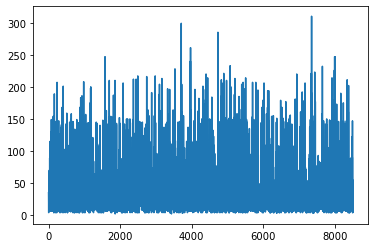

In [68]:
# Word Count Distribution for Description
df4['clean_word_count'].plot(
    x='word_count',
    y='count')

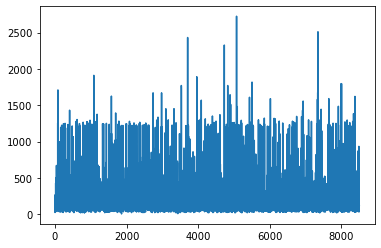

In [130]:
# Description Length Distribution
df4['clean_review_len'].plot(
    x='review length',
    y='count')

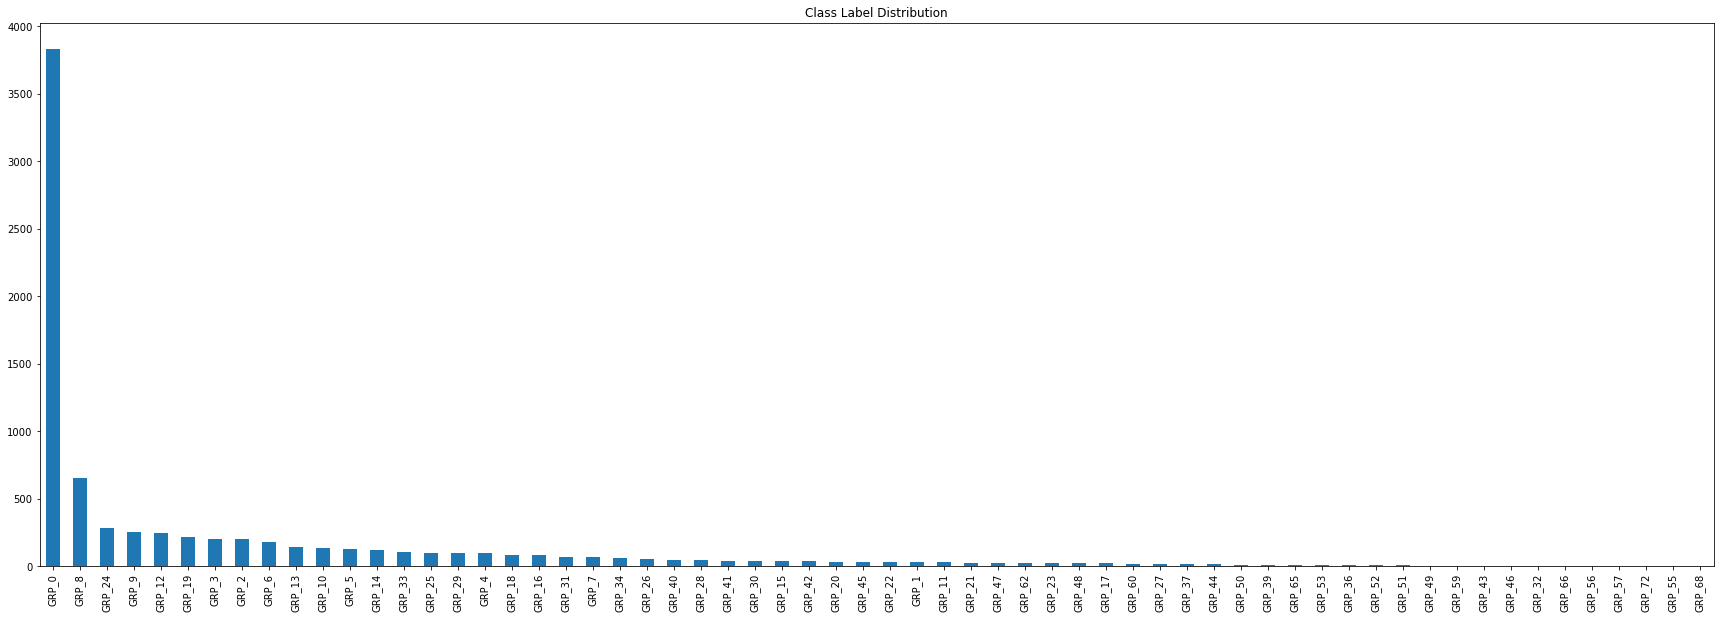

In [131]:
# Assignment group distribution
df4['Assignment group'].value_counts().plot(kind='bar', figsize=(30,10), title='Class Label Distribution')

In [132]:
# The distribution of top unigrams before removing stop words for Complete_Description

from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



common_words = get_top_n_words(df4['Complete_Description'], 20)
for word, freq in common_words:
    print(word, freq)
# df1 = pd.DataFrame(common_words, columns = ['Description' , 'count'])
# df1.groupby('Description').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')


to 8470
the 7096
in 5121
emailaddress 3830
is 3613
from 3521
not 3213
on 2916
and 2754
for 2632
at 2471
no 2410
received 2387
please 2279
2016 2153
00 2007
job 1979
password 1967
job_scheduler 1928
of 1853


In [133]:
# The distribution of top unigrams after removing stop words for Complete_Description

def get_top_n_words(corpus, range=(1,1), n=None):
    vec = CountVectorizer(ngram_range=range, stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df4['Complete_Description'], (1,1),20)
for word, freq in common_words:
    print(word, freq)
# df1 = pd.DataFrame(common_words, columns = ['Description' , 'count'])
# df1.groupby('Description').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')


emailaddress 3830
received 2387
2016 2153
00 2007
job 1979
password 1967
job_scheduler 1928
erp 1852
yes 1774
failed 1738
na 1635
unable 1482
company 1461
10 1367
reset 1336
user 1330
issue 1228
access 1210
error 1073
account 1051


In [134]:
# The distribution of top bigrams after removing stop words for Complete_Description

common_words = get_top_n_words(df4['Complete_Description'], (2,2),20)
for word, freq in common_words:
    print(word, freq)

received emailaddress 2239
failed job_scheduler 1614
yes na 1570
00 job 806
emailaddress job 787
password reset 650
job_scheduler 09 623
job_scheduler 10 576
emailaddress hello 444
backup circuit 441
job_scheduler 08 372
erp sid_34 337
job job_scheduler 300
abended job 298
reset password 297
ticket update 295
type outage 286
scheduled maintenance 286
na company 286
power _________ 283


In [135]:
# The distribution of top trigrams after removing stop words for Complete_Description

common_words = get_top_n_words(df4['Complete_Description'], (3,3) ,20)
for word, freq in common_words:
    print(word, freq)

received emailaddress job 786
failed job_scheduler 09 623
failed job_scheduler 10 576
received emailaddress hello 443
failed job_scheduler 08 372
abended job job_scheduler 298
yes na company 285
________ yes na 267
received emailaddress hi 223
emailaddress mailto emailaddress 173
browser microsoft internet 168
microsoft internet explorer 168
emailaddress customer number 168
language browser microsoft 165
internet explorer emailaddress 165
explorer emailaddress customer 165
received emailaddress dear 161
customer number telephone 160
received emailaddress abended 151
emailaddress abended job 151


In [136]:
df4.shape

(8184, 12)

### Label Encoding

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

Label Encoding Assignment group	

### Need of feature extraction techniques
Machine Learning algorithms learn from a pre-defined set of features from the training data to produce output for the test data. But the main problem in working with language processing is that machine learning algorithms cannot work on the raw text directly. So, we need some feature extraction techniques to convert text into a matrix(or vector) of features.
Some of the most popular methods of feature extraction are :

Bag-of-Words

TF-IDF

In [138]:
df4['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_26',
       'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31', 'GRP_33',
       'GRP_25', 'GRP_34', 'GRP_36', 'GRP_37', 'GRP_39', 'GRP_40',
       'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46',
       'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50', 'GRP_51', 'GRP_52',
       'GRP_53', 'GRP_56', 'GRP_57', 'GRP_59', 'GRP_60', 'GRP_32',
       'GRP_62', 'GRP_65', 'GRP_66', 'GRP_68', 'GRP_55', 'GRP_72'],
      dtype=object)

In [139]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df4['Assignment group LabelEncode']= label_encoder.fit_transform(df4['Assignment group']) 
  
df4['Assignment group LabelEncode'].unique() 

array([ 0,  1, 23, 32, 43, 52, 58, 60, 61,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 24, 25, 27, 18, 28,
       29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47,
       49, 50, 51, 53, 26, 54, 55, 56, 57, 48, 59])

In [144]:
# df4.whered(f4['Assignment group'].count()
df5 = df4.groupby('Assignment group').filter(lambda x: len(x) < 7)

In [141]:
df4.shape
#(8184, 13)

(8184, 13)

In [145]:
df5.shape
#(8184, 13)

(39, 13)

In [162]:
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)

In [163]:
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)

In [164]:
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)

In [166]:
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)

In [156]:
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)

In [157]:
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)

In [158]:
frames = [df4, df5]

#concatenate dataframes
df4 = pd.concat(frames, sort=False)

In [167]:
df4.shape

(8457, 13)

In [168]:
df6 = df4.groupby('Assignment group').filter(lambda x: len(x) < 7)
df6

,Translated_Description,Translated_Short description,Assignment group,Length of Translated_Description Before Summarization,Length of Translated_Short description Before Summarization,Raked Short description,Raked Description,Summarized_Translated_Description,Length of Translated_Description After Summarization,Complete_Description,clean_review_len,clean_word_count,Assignment group LabelEncode


### Term Frequency-Inverse Document Frequency (TF-IDF)

“Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.”

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report


tfidf = TfidfVectorizer(max_features=5000)
x_tfidf = tfidf.fit_transform(df4['Complete_Description']).toarray()


In [170]:
x_tfidf.shape

(8457, 5000)

In [171]:
x_tfidf[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [172]:
y = df4['Assignment group LabelEncode']

In [173]:
y.shape

(8457,)

## Upsampling

In [174]:
# check version number
import imblearn
print(imblearn.__version__)

0.7.0


In [175]:
# summarize class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 3834, 60: 657, 17: 287, 61: 252, 4: 245, 11: 215, 23: 200, 12: 200, 52: 184, 5: 145, 2: 140, 43: 129, 6: 118, 27: 107, 18: 102, 32: 97, 22: 97, 10: 88, 8: 85, 25: 69, 58: 68, 28: 62, 19: 56, 42: 48, 51: 48, 33: 45, 21: 44, 34: 40, 36: 40, 39: 40, 7: 39, 24: 39, 35: 37, 13: 36, 38: 35, 26: 32, 56: 32, 1: 31, 15: 31, 3: 30, 14: 29, 40: 27, 9: 25, 16: 25, 41: 25, 54: 25, 49: 24, 53: 20, 20: 18, 30: 16, 50: 16, 59: 16, 37: 15, 44: 14, 31: 12, 29: 11, 47: 11, 55: 11, 46: 9, 45: 8, 57: 8, 48: 8})


In [176]:
from matplotlib import pyplot
from numpy import where

In [177]:
from imblearn.over_sampling import SMOTE

In [178]:
oversample = SMOTE()
X, y = oversample.fit_resample(x_tfidf, y)

In [100]:
x_tfidf.shape

(8184, 5000)

In [ ]:
y.shape